In [39]:
####################################################
import matplotlib.pyplot as plt
import matplotlib
####################################################
import scipy.fftpack
from scipy.signal import find_peaks
####################################################
import numpy as np
import csv
####################################################
import pandas as pd
from pandas import DataFrame
import pandas_profiling
from pandas_profiling import ProfileReport
####################################################
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.io as pio
#import kaleido
####################################################
from datetime import datetime
import datetime as dt
from datetime import timedelta
####################################################
import math
import operator
from operator import methodcaller
####################################################
from docx import Document
from docx.shared import Inches
from docx2pdf import convert
####################################################
import os
import pathlib
import tkinter

# %matplotlib widget
%matplotlib inline


## Basic Fixed Trigonometry for engine with TVC in single axis neutral position
##### here the only possible inputs are the length from the gimbal point to the rod-end mounting point of the TVC, the horizontal distance from the gimbal to the motor-end mounting point is fixed by the other two distances, also the plane of the gimbal and the plane of the motor-end mounting point are assumed to be the same.

In [40]:
# A^2 = B^2 + C^2
thetaA = 90
# use A=1.12B
B = 252 #Eng Gmb-TVC-Rnd length (mm)
A = 268 #1.12*B #TVC-ACT length (mm)

C = 92
#(A**2 - B**2)**0.5
#A = (C**2 + B**2)**0.5
print(A)
print (C)

thetaB = math.degrees(math.asin(B/A))
thetaC = math.degrees(math.asin(C/A))

print (thetaB)
print (thetaC)
# print(thetaA+thetaB+thetaC)

268
92
70.10174740568046
20.07705440087481


# Cosine Rule fixed Position
#### here the engine is still fixed, but now at a maximum actuation angle, this is too acess the required actuation length of the TVC actuator.

EngMaxThetaRange :  [ 77.          77.53061224  78.06122449  78.59183673  79.12244898
  79.65306122  80.18367347  80.71428571  81.24489796  81.7755102
  82.30612245  82.83673469  83.36734694  83.89795918  84.42857143
  84.95918367  85.48979592  86.02040816  86.55102041  87.08163265
  87.6122449   88.14285714  88.67346939  89.20408163  89.73469388
  90.26530612  90.79591837  91.32653061  91.85714286  92.3877551
  92.91836735  93.44897959  93.97959184  94.51020408  95.04081633
  95.57142857  96.10204082  96.63265306  97.16326531  97.69387755
  98.2244898   98.75510204  99.28571429  99.81632653 100.34693878
 100.87755102 101.40816327 101.93877551 102.46938776 103.        ]

TVCActLength :  [-19.93253032252764, -19.08974332382843, -18.248081309991846, -17.407604766750325, -16.56837352759476, -15.73044678139064, -14.893883079924052, -14.058740345374304, -13.225075877711703, -12.392946362018222, -11.562407875729832, -10.733515895798632, -9.906325305773123, -9.08089040279657, -8.2572649045207

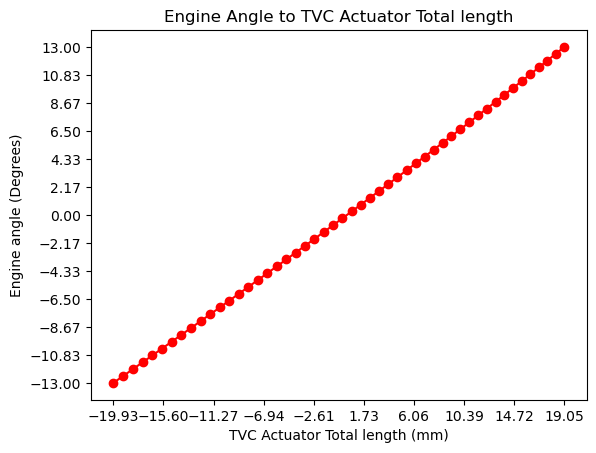

In [44]:
EngMaxTheta = 13

EngMaxThetaRange = np.linspace(-EngMaxTheta, EngMaxTheta, 50)
EngMaxThetaRange = 90 + EngMaxThetaRange  
TVCActLength = []
  
for i in range(len(EngMaxThetaRange)):
    TVCActLength.append((B**2 + C**2 -(2*B*C) * math.cos(math.radians(EngMaxThetaRange[i])))**0.5- A)
    i += 1
  
## prints out series values   
print("EngMaxThetaRange : ", EngMaxThetaRange) 
print("\nTVCActLength : ", TVCActLength) 
  
# red for numpy.sin() 
plt.plot( TVCActLength,EngMaxThetaRange - thetaA, color = 'red', marker = "o") 
plt.title("Engine Angle to TVC Actuator Total length") 
plt.xlabel("TVC Actuator Total length (mm)") 
plt.ylabel("Engine angle (Degrees)")
plt.yticks(np.linspace(min(EngMaxThetaRange - thetaA),max(EngMaxThetaRange - thetaA), 13)) 
plt.xticks(np.linspace(min(TVCActLength),max(TVCActLength), 10))
plt.show() 

## Y = mx+c

In [42]:
# Calculation to score the performance of a TVC layout design based on the
# gradient constant of the relationship between TVC actuation length and engine angle

dY = max(EngMaxThetaRange) - min(EngMaxThetaRange)
dX = max(TVCActLength) - min(TVCActLength)

m = (dY/dX)
print(m)

0.6669407527217085
